# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Открытие-файла-с-данными-и-изучение-общей-информации" data-toc-modified-id="Открытие-файла-с-данными-и-изучение-общей-информации-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Открытие файла с данными и изучение общей информации</a></span><ul class="toc-item"><li><span><a href="#Знакомство-с-данными" data-toc-modified-id="Знакомство-с-данными-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Знакомство с данными</a></span></li><li><span><a href="#Визуализация-данных" data-toc-modified-id="Визуализация-данных-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Визуализация данных</a></span></li><li><span><a href="#Выводы" data-toc-modified-id="Выводы-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Выводы</a></span></li></ul></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span><ul class="toc-item"><li><span><a href="#Поиск-пропущенных-значений-в-столбцах" data-toc-modified-id="Поиск-пропущенных-значений-в-столбцах-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Поиск пропущенных значений в столбцах</a></span></li><li><span><a href="#Обработка-пропущенных-значений-в-столбцах" data-toc-modified-id="Обработка-пропущенных-значений-в-столбцах-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Обработка пропущенных значений в столбцах</a></span></li><li><span><a href="#Поиск-столбцов,-для-которых-нужно-изменить-тип-данных" data-toc-modified-id="Поиск-столбцов,-для-которых-нужно-изменить-тип-данных-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Поиск столбцов, для которых нужно изменить тип данных</a></span></li><li><span><a href="#Поиск-и-устранение-дубликатов-в-столбце-locality_name" data-toc-modified-id="Поиск-и-устранение-дубликатов-в-столбце-locality_name-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Поиск и устранение дубликатов в столбце locality_name</a></span></li><li><span><a href="#Поиск-и-устранение-редких-и-выбивающихся-значений" data-toc-modified-id="Поиск-и-устранение-редких-и-выбивающихся-значений-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Поиск и устранение редких и выбивающихся значений</a></span><ul class="toc-item"><li><span><a href="#last_price" data-toc-modified-id="last_price-2.5.1"><span class="toc-item-num">2.5.1&nbsp;&nbsp;</span>last_price</a></span></li><li><span><a href="#total_area" data-toc-modified-id="total_area-2.5.2"><span class="toc-item-num">2.5.2&nbsp;&nbsp;</span>total_area</a></span></li><li><span><a href="#rooms" data-toc-modified-id="rooms-2.5.3"><span class="toc-item-num">2.5.3&nbsp;&nbsp;</span>rooms</a></span></li><li><span><a href="#ceiling_height" data-toc-modified-id="ceiling_height-2.5.4"><span class="toc-item-num">2.5.4&nbsp;&nbsp;</span>ceiling_height</a></span></li><li><span><a href="#kitchen_area" data-toc-modified-id="kitchen_area-2.5.5"><span class="toc-item-num">2.5.5&nbsp;&nbsp;</span>kitchen_area</a></span></li><li><span><a href="#Выводы" data-toc-modified-id="Выводы-2.5.6"><span class="toc-item-num">2.5.6&nbsp;&nbsp;</span>Выводы</a></span></li></ul></li><li><span><a href="#Добавление-в-таблицу-новых-столбцов" data-toc-modified-id="Добавление-в-таблицу-новых-столбцов-2.6"><span class="toc-item-num">2.6&nbsp;&nbsp;</span>Добавление в таблицу новых столбцов</a></span><ul class="toc-item"><li><span><a href="#Цена-одного-квадратного-метра" data-toc-modified-id="Цена-одного-квадратного-метра-2.6.1"><span class="toc-item-num">2.6.1&nbsp;&nbsp;</span>Цена одного квадратного метра</a></span></li><li><span><a href="#День-недели-публикации-объявления" data-toc-modified-id="День-недели-публикации-объявления-2.6.2"><span class="toc-item-num">2.6.2&nbsp;&nbsp;</span>День недели публикации объявления</a></span></li><li><span><a href="#Месяц-публикации-объявления" data-toc-modified-id="Месяц-публикации-объявления-2.6.3"><span class="toc-item-num">2.6.3&nbsp;&nbsp;</span>Месяц публикации объявления</a></span></li><li><span><a href="#Год-публикации-объявления" data-toc-modified-id="Год-публикации-объявления-2.6.4"><span class="toc-item-num">2.6.4&nbsp;&nbsp;</span>Год публикации объявления</a></span></li><li><span><a href="#Тип-этажа-квартиры" data-toc-modified-id="Тип-этажа-квартиры-2.6.5"><span class="toc-item-num">2.6.5&nbsp;&nbsp;</span>Тип этажа квартиры</a></span></li><li><span><a href="#Расстояние-до-центра-города-в-километрах" data-toc-modified-id="Расстояние-до-центра-города-в-километрах-2.6.6"><span class="toc-item-num">2.6.6&nbsp;&nbsp;</span>Расстояние до центра города в километрах</a></span></li></ul></li></ul></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span><ul class="toc-item"><li><span><a href="#Исследование-параметров-объекта" data-toc-modified-id="Исследование-параметров-объекта-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Исследование параметров объекта</a></span><ul class="toc-item"><li><span><a href="#Общая-площадь-(total_area)" data-toc-modified-id="Общая-площадь-(total_area)-3.1.1"><span class="toc-item-num">3.1.1&nbsp;&nbsp;</span>Общая площадь (total_area)</a></span></li><li><span><a href="#Жилая-площадь-(living_area)" data-toc-modified-id="Жилая-площадь-(living_area)-3.1.2"><span class="toc-item-num">3.1.2&nbsp;&nbsp;</span>Жилая площадь (living_area)</a></span></li><li><span><a href="#Площадь-кухни-(kitchen_area)" data-toc-modified-id="Площадь-кухни-(kitchen_area)-3.1.3"><span class="toc-item-num">3.1.3&nbsp;&nbsp;</span>Площадь кухни (kitchen_area)</a></span></li><li><span><a href="#Цена-объекта" data-toc-modified-id="Цена-объекта-3.1.4"><span class="toc-item-num">3.1.4&nbsp;&nbsp;</span>Цена объекта</a></span></li><li><span><a href="#Количество-комнат" data-toc-modified-id="Количество-комнат-3.1.5"><span class="toc-item-num">3.1.5&nbsp;&nbsp;</span>Количество комнат</a></span></li><li><span><a href="#Высота-потолков" data-toc-modified-id="Высота-потолков-3.1.6"><span class="toc-item-num">3.1.6&nbsp;&nbsp;</span>Высота потолков</a></span></li><li><span><a href="#Этаж-квартиры" data-toc-modified-id="Этаж-квартиры-3.1.7"><span class="toc-item-num">3.1.7&nbsp;&nbsp;</span>Этаж квартиры</a></span></li><li><span><a href="#Тип-этажа-квартиры-(«первый»,-«последний»,-«другой»)" data-toc-modified-id="Тип-этажа-квартиры-(«первый»,-«последний»,-«другой»)-3.1.8"><span class="toc-item-num">3.1.8&nbsp;&nbsp;</span>Тип этажа квартиры («первый», «последний», «другой»)</a></span></li><li><span><a href="#Общее-количество-этажей-в-доме" data-toc-modified-id="Общее-количество-этажей-в-доме-3.1.9"><span class="toc-item-num">3.1.9&nbsp;&nbsp;</span>Общее количество этажей в доме</a></span></li><li><span><a href="#Расстояние-до-центра-города-в-метрах" data-toc-modified-id="Расстояние-до-центра-города-в-метрах-3.1.10"><span class="toc-item-num">3.1.10&nbsp;&nbsp;</span>Расстояние до центра города в метрах</a></span></li><li><span><a href="#Расстояние-до-ближайшего-парка" data-toc-modified-id="Расстояние-до-ближайшего-парка-3.1.11"><span class="toc-item-num">3.1.11&nbsp;&nbsp;</span>Расстояние до ближайшего парка</a></span></li><li><span><a href="#День-публикации-объявления" data-toc-modified-id="День-публикации-объявления-3.1.12"><span class="toc-item-num">3.1.12&nbsp;&nbsp;</span>День публикации объявления</a></span></li><li><span><a href="#Месяц-публикации-объявления" data-toc-modified-id="Месяц-публикации-объявления-3.1.13"><span class="toc-item-num">3.1.13&nbsp;&nbsp;</span>Месяц публикации объявления</a></span></li><li><span><a href="#Выводы" data-toc-modified-id="Выводы-3.1.14"><span class="toc-item-num">3.1.14&nbsp;&nbsp;</span>Выводы</a></span></li></ul></li><li><span><a href="#Анализ-скорости-продажи-квартиры" data-toc-modified-id="Анализ-скорости-продажи-квартиры-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Анализ скорости продажи квартиры</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-3.2.1"><span class="toc-item-num">3.2.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Определение-факторов,-влияющих-на-полную-стоимость-объекта" data-toc-modified-id="Определение-факторов,-влияющих-на-полную-стоимость-объекта-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Определение факторов, влияющих на полную стоимость объекта</a></span><ul class="toc-item"><li><span><a href="#Общая-площадь" data-toc-modified-id="Общая-площадь-3.3.1"><span class="toc-item-num">3.3.1&nbsp;&nbsp;</span>Общая площадь</a></span></li><li><span><a href="#Жилая-площадь" data-toc-modified-id="Жилая-площадь-3.3.2"><span class="toc-item-num">3.3.2&nbsp;&nbsp;</span>Жилая площадь</a></span></li><li><span><a href="#Площадь-кухни" data-toc-modified-id="Площадь-кухни-3.3.3"><span class="toc-item-num">3.3.3&nbsp;&nbsp;</span>Площадь кухни</a></span></li><li><span><a href="#Количество-комнат" data-toc-modified-id="Количество-комнат-3.3.4"><span class="toc-item-num">3.3.4&nbsp;&nbsp;</span>Количество комнат</a></span></li><li><span><a href="#Этаж" data-toc-modified-id="Этаж-3.3.5"><span class="toc-item-num">3.3.5&nbsp;&nbsp;</span>Этаж</a></span></li><li><span><a href="#День-недели-публикации-объявления" data-toc-modified-id="День-недели-публикации-объявления-3.3.6"><span class="toc-item-num">3.3.6&nbsp;&nbsp;</span>День недели публикации объявления</a></span></li><li><span><a href="#Месяц-публикации-объявления" data-toc-modified-id="Месяц-публикации-объявления-3.3.7"><span class="toc-item-num">3.3.7&nbsp;&nbsp;</span>Месяц публикации объявления</a></span></li><li><span><a href="#Год-публикации-объявления" data-toc-modified-id="Год-публикации-объявления-3.3.8"><span class="toc-item-num">3.3.8&nbsp;&nbsp;</span>Год публикации объявления</a></span></li></ul></li><li><span><a href="#Анализ-стоимости-одного-квадратного-метра" data-toc-modified-id="Анализ-стоимости-одного-квадратного-метра-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Анализ стоимости одного квадратного метра</a></span></li><li><span><a href="#Оценка-зависимости-цены-от-расстояния-до-центра" data-toc-modified-id="Оценка-зависимости-цены-от-расстояния-до-центра-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Оценка зависимости цены от расстояния до центра</a></span></li></ul></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Общий вывод</a></span></li></ul></div>

## Открытие файла с данными и изучение общей информации

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

### Знакомство с данными

Чтение файла с данными. В качестве разделителя указываем знак табуляции. Результат сохраняем в датафрейм data

In [2]:
# Будем отображать числа с точностью до сотых
pd.options.display.float_format ='{:,.2f}'.format

try:
    data = pd.read_csv('C:\\Users\\data_science\\projects\\datasets\\real_estate_data.csv', 
                       '\t')
except FileNotFoundError:
    data = pd.read_csv('/datasets/real_estate_data.csv', '\t')
display(data.head())

# Отображаем общую информацию о данных
data.info()

C:\Users\maria\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3369: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only.
  exec(code_obj, self.user_global_ns, self.user_ns)


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,"13,000,000.00",108.00,2019-03-07T00:00:00,3,2.70,16.00,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,"18,863.00","16,028.00",1.00,482.00,2.00,755.00,NaN
1,7,"3,350,000.00",40.40,2018-12-04T00:00:00,1,NaN,11.00,18.60,1,NaN,...,11.00,2.00,посёлок Шушары,"12,817.00","18,603.00",0.00,NaN,0.00,NaN,81.00
2,10,"5,196,000.00",56.00,2015-08-20T00:00:00,2,NaN,5.00,34.30,4,NaN,...,8.30,0.00,Санкт-Петербург,"21,741.00","13,933.00",1.00,90.00,2.00,574.00,558.00
3,0,"64,900,000.00",159.00,2015-07-24T00:00:00,3,NaN,14.00,NaN,9,NaN,...,NaN,0.00,Санкт-Петербург,"28,098.00","6,800.00",2.00,84.00,3.00,234.00,424.00
4,2,"10,000,000.00",100.00,2018-06-19T00:00:00,2,3.03,14.00,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,"31,856.00","8,098.00",2.00,112.00,1.00,48.00,121.00


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Во избежание ошибок в дальнейшем переименуем столбец cityCenters_nearest в соответствии со змеиной нотацией ->  city_centers_nearest

In [3]:
# Переименовываем столбец cityCenters_nearest в city_centers_nearest
data.rename(columns={'cityCenters_nearest': 'city_centers_nearest'}, inplace=True)

### Визуализация данных

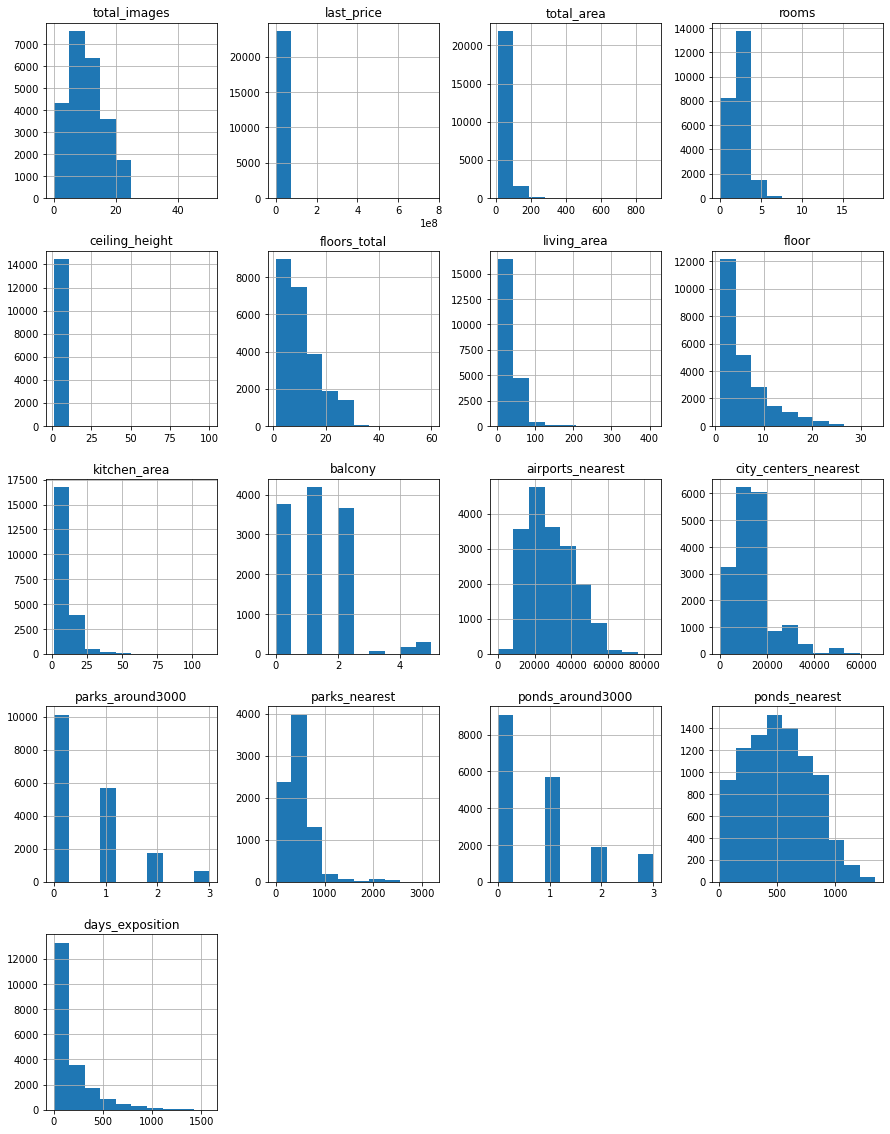

In [4]:
# Строим общую гистограмму по всем столбцам таблицы
data.hist(figsize=(15, 20));

### Выводы

Мы считали файл с данными в датафрейм. Датафрейм содержит 22 столбца, 23699 строк. В некоторых столбцах присутствуют пропуски в данных. Кроме того, в некоторых столбцах необходимо изменить тип данных.
    
Мы переименовали столбец *cityCenters_nearest*  в *city_centers_nearest*, чтобы избежать ошибок в написании. 
    
Мы также построили гистограммы по всем столбцам, по которым видно, что в столбцах last_price, total_area, rooms, ceiling_height, kitchen_area наблюдается большой разброс данных.

## Предобработка данных

### Поиск пропущенных значений в столбцах

In [5]:
# Определяем, в каких столбцах есть пропуски, выводим число пропусков в процентах и число таких столбцов
print('Процент пропусков в столбцах')
print((data.isna().sum() / data.shape[0] * 100).astype(int))
print('Число столбцов с пропусками: ', data.isna().any().sum())

Процент пропусков в столбцах
total_images             0
last_price               0
total_area               0
first_day_exposition     0
rooms                    0
ceiling_height          38
floors_total             0
living_area              8
floor                    0
is_apartment            88
studio                   0
open_plan                0
kitchen_area             9
balcony                 48
locality_name            0
airports_nearest        23
city_centers_nearest    23
parks_around3000        23
parks_nearest           65
ponds_around3000        23
ponds_nearest           61
days_exposition         13
dtype: int32
Число столбцов с пропусками:  14


### Обработка пропущенных значений в столбцах

Заполняем пропуски в следующих столбцах:
- *ceiling_height*: нестаднартная высота потолка была бы указана в объявлении в качестве преимущества, пропуск вероятнее всего соответсвует стандартной высоте, которую мы рассчитаем как медианное значение высоты по всему набору данных.
- *living_area*: заполняем медианным значением для объектов с таким же количеством комнат.
- *is_apartment*: если значение пропущено, то объект скорее всего не является апартаментами; заполняем пропуски значением False
- *balcony*: если число балконов не указано, то скорее всего их нет; заполняем пропуски нулями.
- *parks_around3000*: если для объекта указан параметр park_nearest и он меньше или равен 3 км, то вместо пропуска подставляем значение 1; если параметр не указан или больше 3 км, то подставляем 0.
- *ponds_around3000*: если для объекта указан параметр ponds_nearest и он меньше или раавен 3 км, то вместо пропуска подставляем значение 1; если параметр не указан или больше 3 км, то подставляем 0.
- *airports_nearest* и *cityCenters_nearest* заполняем самым частым значением по местности locality_name
- floors_total: заполняем медианным значением или числом floor, если оно превышает медианное значение
- days_exposition: заполняем медианным значением

Пропуски в остальных столбцах оставляем без изменений.

In [6]:
# ceiling_height - заполняем пропуски медианным значением высоты

data['ceiling_height'].fillna(value=data['ceiling_height'].median(), inplace=True)

In [7]:
# living_area - заполняем пропуски медианным значением для соответсвующего числа комнат

data['living_area'] = data['living_area'].fillna(data.groupby('rooms')['living_area'].transform('median'))

In [8]:
# is_apartment - заполняем пропуски значением False

data['is_apartment'].fillna(value=False, inplace=True)

In [9]:
# balcony - заполняем пропуски числом 0

data['balcony'].fillna(value=0, inplace=True)

In [10]:
# parks_around3000 и ponds_around3000
# Определяем функцию get_value для подстановки значения в столбец *_around3000:
# для пропусков проверяем столбец *_nearest, если значение в нем меньше 3000, то возвращаем 1,
# иначе пропуск заменяем на 0.
# Вызываем функцию для заполнения пропусков в столбцах

def get_value(around, near):
    if math.isnan(around):
        if near <= 3000:
            return 1
        else:
            return 0
    return around

In [11]:
data['parks_around3000'] = data.apply(lambda x: get_value(x.parks_around3000, x.parks_nearest), axis=1)
data['ponds_around3000'] = data.apply(lambda x: get_value(x.ponds_around3000, x.ponds_nearest), axis=1)

In [12]:
data.city_centers_nearest.isna().sum()

5519

In [13]:
# airports_nearest и city_centers_nearest
# Вместо пропусков airports_nearest и city_centers_nearest подставляем средние значения для этой местности.

data['airports_nearest'] = data['airports_nearest'].fillna(data.groupby('locality_name')['airports_nearest']
                                                               .transform('mean'))
data['city_centers_nearest'] = data['city_centers_nearest'].fillna(data.groupby('locality_name')['city_centers_nearest']
                                                                       .transform('mean'))

In [14]:
# Проверяем наличиепропусков для этих столбцов и удаляем их
print('Пропусков в столбце airports_nearest: ', data.airports_nearest.isna().sum())
print('Пропусков в столбце city_centers_nearest: ', data.city_centers_nearest.isna().sum())
data.dropna(subset=['airports_nearest'], inplace=True)
data.dropna(subset=['city_centers_nearest'], inplace=True)

Пропусков в столбце airports_nearest:  5394
Пропусков в столбце city_centers_nearest:  5394


In [15]:
# floors_total - заполняем пропуски значением из столбца floor

data['floors_total'] = data['floors_total'].fillna(data['floor'])

In [16]:
# days_exposition - заполняем пропуски медианным значением

data['days_exposition'] = data['days_exposition'].fillna(data['days_exposition'].median());

In [17]:
# Удалим строки с пропуском в столбце locality_name. Поскольку местоположение квартиры имеет первостепенное значение,
# строки без этого значения не будут показательны для анализа

data.dropna(subset=['locality_name'], inplace=True)

In [18]:
# Проверим, что пропуски в обработанных столбцах отсутствуют.
# Проверяем столбцы ceiling_height, living_area, is_apartment, balcony, 
#                   parks_around3000, ponds_around3000, floors_total и days_exposition.

data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area             1582
balcony                     0
locality_name               0
airports_nearest            0
city_centers_nearest        0
parks_around3000            0
parks_nearest           10200
ponds_around3000            0
ponds_nearest            9179
days_exposition             0
dtype: int64

**Выводы**
- Больше всего пропусков содержится в столбцах parks_nearest и ponds_nearest. Скорее всего этих полей не было в заполняемой форме, также как и airports_nearest и city_centers_nearest, потому что эти поля незаполнены одновременно.
- Меньше всего пропусков в столбцах floors_total и locality_name. Поскольу пропусков немного и эти параметры важны при выборе квартиры, вероятнее всего они отсутствуют из-за ошибок операторов, вводящих данные.
- По числу пропусков в стобцах kitchen_area и days_exposition можно предположить, что они связаны с системной ошибкой.
- Поскольку местоположение квартиры имеет первостепенное значение, cтроки без этого значения не будут показательны для анализа. Поэтому мы удалили строки, в которых пропущены значения для locality_name.

###  Поиск столбцов, для которых нужно изменить тип данных

In [19]:
# Отображаем общую информацию о данных
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18264 entries, 0 to 23697
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          18264 non-null  int64  
 1   last_price            18264 non-null  float64
 2   total_area            18264 non-null  float64
 3   first_day_exposition  18264 non-null  object 
 4   rooms                 18264 non-null  int64  
 5   ceiling_height        18264 non-null  float64
 6   floors_total          18264 non-null  float64
 7   living_area           18264 non-null  float64
 8   floor                 18264 non-null  int64  
 9   is_apartment          18264 non-null  bool   
 10  studio                18264 non-null  bool   
 11  open_plan             18264 non-null  bool   
 12  kitchen_area          16682 non-null  float64
 13  balcony               18264 non-null  float64
 14  locality_name         18264 non-null  object 
 15  airports_nearest   

**Выводы**

Изучив типы данных столбцов, делаем вывод, что необходимо преобразовать тип данных для следующих столбцов:
- first_day_exposition: object -> datetime (т. к. это дата),
- floors_total: float64 -> int (т. к. количество этажей - целое число),
- balcony: float64 -> int (т. к. количество балконов - целое число),
- days_exposition: float64 -> int (т. к. количество дней - целое число).

In [20]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')
data['floors_total'] = data['floors_total'].astype(int)
data['balcony'] = data['balcony'].astype(int)
data['days_exposition'] = data['days_exposition'].astype(int)

print('Тип данных в столбце first_day_exposition после преобразования:', data['first_day_exposition'].dtype) # проверка
print('Тип данных в столбце floors_total после преобразования:', data['floors_total'].dtype) # проверка
print('Тип данных в столбце balcony после преобразования:', data['balcony'].dtype) # проверка
print('Тип данных в столбце days_exposition после преобразования:', data['days_exposition'].dtype) # проверка

Тип данных в столбце first_day_exposition после преобразования: datetime64[ns]
Тип данных в столбце floors_total после преобразования: int32
Тип данных в столбце balcony после преобразования: int32
Тип данных в столбце days_exposition после преобразования: int32


### Поиск и устранение дубликатов в столбце locality_name

In [21]:
# Выводим на экран отсортированный список уникальных названий
display(sorted(data['locality_name'].unique()))
print('Количество уникальных названий:', len(data['locality_name'].unique()))

['Зеленогорск',
 'Колпино',
 'Красное Село',
 'Кронштадт',
 'Ломоносов',
 'Павловск',
 'Петергоф',
 'Пушкин',
 'Санкт-Петербург',
 'Сестрорецк',
 'поселок Лисий Нос',
 'поселок Мурино',
 'посёлок Александровская',
 'посёлок Белоостров',
 'посёлок Левашово',
 'посёлок Лисий Нос',
 'посёлок Металлострой',
 'посёлок Молодёжное',
 'посёлок Парголово',
 'посёлок Песочный',
 'посёлок Петро-Славянка',
 'посёлок Понтонный',
 'посёлок Репино',
 'посёлок Сапёрный',
 'посёлок Стрельна',
 'посёлок Усть-Ижора',
 'посёлок Шушары',
 'посёлок Щеглово']

Количество уникальных названий: 28


Чтобы удалить дубликаты, выполним следующие действия:
- меняем букву ё на е
- удаляем описательные слова: городской поселок, коттеджный поселок, поселок, поселок городского типа, посёлок при железнодорожной станции, поселок станции, деревня, село, садоводческое некоммерческое товарищество, садовое товарищество.

In [22]:
# меняем букву ё на е
data['locality_name'] = data['locality_name'].str.replace('ё', 'е')   

In [23]:
# удалим описательные слова
description_list = ['городской поселок', 'коттеджный поселок', 'поселок городского типа', 
                    'поселок станции', 'поселок при железнодорожной станции', 'поселок',
                    'деревня', 'село',
                    'садоводческое некоммерческое товарищество', 'садовое товарищество']
for item in description_list:
    data['locality_name'] = data['locality_name'].apply(lambda x: x.lstrip(item)) 

### Поиск и устранение редких и выбивающихся значений

Выведем на экран информацию о столбцах и сохраним число объявлений в отдельную переменную count_all для использования в анализе.

In [24]:
count_all = data.shape[0]
print('Всего объявлений -', count_all)
data.describe()

Всего объявлений - 18264


,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,"18,264.00","18,264.00","18,264.00","18,264.00","18,264.00","18,264.00","18,264.00","18,264.00","16,682.00","18,264.00","18,264.00","18,264.00","18,264.00","8,064.00","18,264.00","9,085.00","18,264.00"
mean,10.03,"7,585,632.04",63.37,2.14,2.74,11.17,35.93,6.14,10.96,0.58,"28,879.46","14,236.24",0.61,490.83,0.76,518.06,171.08
std,5.74,"12,176,980.47",38.93,1.12,0.98,6.55,23.53,4.95,6.36,0.96,"12,679.53","8,624.99",0.80,342.55,0.94,277.84,210.26
min,0.00,"12,190.00",12.00,0.00,1.00,1.00,2.00,1.00,1.30,0.00,0.00,181.00,0.00,1.00,0.00,13.00,1.00
25%,6.00,"4,000,000.00",41.10,1.00,2.60,5.00,19.00,3.00,7.10,0.00,"18,625.00","9,289.00",0.00,288.00,0.00,293.00,46.00
50%,10.00,"5,250,000.00",54.00,2.00,2.65,9.00,30.56,5.00,9.70,0.00,"26,880.50","13,107.00",0.00,454.50,0.00,502.00,96.00
75%,14.00,"7,690,000.00",73.00,3.00,2.73,16.00,44.00,8.00,12.20,1.00,"37,348.00","16,318.25",1.00,612.00,1.00,730.00,201.00
max,50.00,"763,000,000.00",900.00,19.00,100.00,60.00,409.70,33.00,112.00,5.00,"84,869.00","65,968.00",3.00,"3,190.00",3.00,"1,344.00","1,572.00"


Рассмотрим подробнее столбцы с выбивающимися значениями.

#### last_price

In [25]:
# Добавим в таблицу новый столбец price_in_mill, в котором сохраним стоимость в миллионах
data['price_in_mill'] = data['last_price'] / 1000000

In [26]:
# Выведем статистические сведения о столбце
print(data['price_in_mill'].describe())

count   18,264.00
mean         7.59
std         12.18
min          0.01
25%          4.00
50%          5.25
75%          7.69
max        763.00
Name: price_in_mill, dtype: float64


Максимальное значение 763 млн, при этом 75% квартир дешевле 6,8 млн.

Построим диаграмму размаха, чтобы оценить, выше какого порога значения можно считать нестандартными

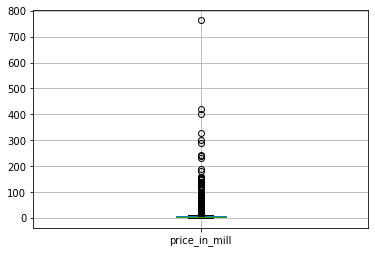

In [27]:
data.boxplot(column='price_in_mill');

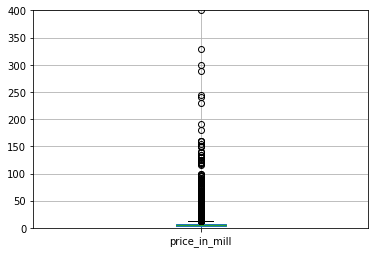

In [28]:
# Для лучшего обзора изменим пределы по оси y
plt.ylim(0, 400)
data.boxplot(column='price_in_mill');

Посчитаем долю квартир, стоимостью больше 200 млн.

In [29]:
print('Доля квартир стоимостью больше 200 млн -', data[data['price_in_mill'] > 200]['price_in_mill'].count()/count_all)

Доля квартир стоимостью больше 200 млн - 0.0004927726675427069


Будем считать значения стоимости больше 200 выбросами и удалим эти строки.

In [30]:
data = data.drop(data[data['price_in_mill'] > 400].index)

#### total_area

Выведем статистические сведения о столбце.

In [31]:
print(data['total_area'].describe())

count   18,261.00
mean        63.28
std         38.27
min         12.00
25%         41.10
50%         54.00
75%         73.00
max        631.20
Name: total_area, dtype: float64


Максимальное значение 900, при этом 75% значений ниже 70 кв. м.

Чтобы оценить, выше какого порога значения можно считать нестандартными, построим гистограмму.

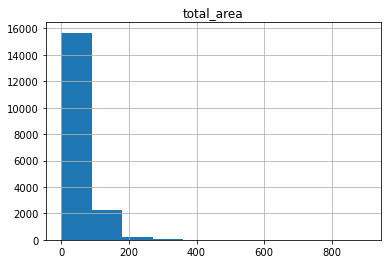

In [32]:
data.hist('total_area', range=(0, 900));

На гистограмме видно, что основная часть результатов меньше 200. Рассмотрим диапазон 200-900 ближе.

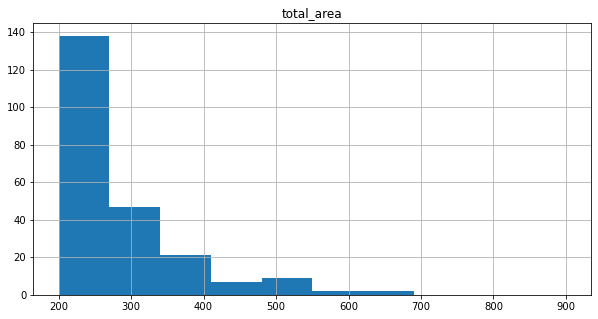

In [33]:
data.hist('total_area', range=(200, 900), figsize=(10, 5));

На гистограмме для 200 метров мы видим достатоно большое количество квартир. Число квартир падает к площади 400.

Посчитаем долю квартир с площадью > 400

In [34]:
print('Доля квартир площадью больше 400 -', data[data['total_area'] > 400]['total_area'].count()/count_all)

Доля квартир площадью больше 400 - 0.0011498028909329829


Будем считать значения общей площади больше 400 выбросами и удалим этим строки.

In [35]:
data = data.drop(data[data['total_area'] > 400].index)

#### rooms

Выведем статистические сведения о столбце.

In [36]:
print(data['rooms'].describe())

count   18,240.00
mean         2.13
std          1.11
min          0.00
25%          1.00
50%          2.00
75%          3.00
max         19.00
Name: rooms, dtype: float64


Максимальное значение равно 19, а 75% меньше 3.

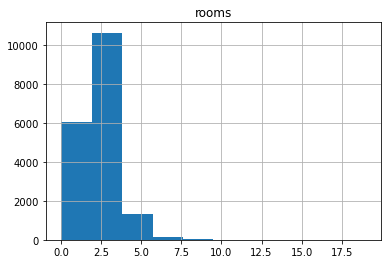

In [37]:
data.hist('rooms', range=(0, 19));

Рассмотрим ближе диапазон от 7.5 до 19.

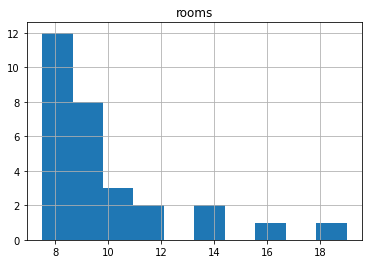

In [38]:
data.hist('rooms', range=(7.5, 19));

Найдем долю квартир, в которых больше 12 комнат.

In [39]:
print('Число квартир, в которых больше 12 комнат, -', data[data['rooms'] > 12]['rooms'].count()/count_all)

Число квартир, в которых больше 12 комнат, - 0.0002190100744634253


Будем считать значения числа комнат больше 12 выбросами и удалим этим строки.

In [40]:
data = data.drop(data[data['rooms'] > 12].index)

#### ceiling_height

Выведем статистические сведения о столбце.

In [41]:
print(data['ceiling_height'].describe())

count   18,236.00
mean         2.74
std          0.98
min          1.00
25%          2.60
50%          2.65
75%          2.72
max        100.00
Name: ceiling_height, dtype: float64


Максимальное значение неправдоподобно большое - 100.

Выведем на экран уникальные значения этого столбца, отсортированные по возврастанию

In [42]:
sorted(data['ceiling_height'].unique())

[1.0,
 1.75,
 2.0,
 2.3,
 2.4,
 2.45,
 2.46,
 2.47,
 2.48,
 2.49,
 2.5,
 2.51,
 2.52,
 2.53,
 2.54,
 2.55,
 2.56,
 2.57,
 2.58,
 2.59,
 2.6,
 2.61,
 2.62,
 2.63,
 2.64,
 2.65,
 2.66,
 2.67,
 2.68,
 2.69,
 2.7,
 2.71,
 2.72,
 2.73,
 2.74,
 2.75,
 2.76,
 2.77,
 2.78,
 2.79,
 2.8,
 2.81,
 2.82,
 2.83,
 2.84,
 2.85,
 2.86,
 2.87,
 2.88,
 2.89,
 2.9,
 2.91,
 2.92,
 2.93,
 2.94,
 2.95,
 2.96,
 2.97,
 2.98,
 2.99,
 3.0,
 3.01,
 3.02,
 3.03,
 3.04,
 3.05,
 3.06,
 3.07,
 3.08,
 3.09,
 3.1,
 3.11,
 3.12,
 3.13,
 3.14,
 3.15,
 3.16,
 3.17,
 3.18,
 3.2,
 3.21,
 3.22,
 3.23,
 3.24,
 3.25,
 3.26,
 3.27,
 3.28,
 3.29,
 3.3,
 3.31,
 3.32,
 3.33,
 3.34,
 3.35,
 3.36,
 3.37,
 3.38,
 3.39,
 3.4,
 3.42,
 3.43,
 3.44,
 3.45,
 3.46,
 3.47,
 3.48,
 3.49,
 3.5,
 3.51,
 3.52,
 3.53,
 3.54,
 3.55,
 3.56,
 3.57,
 3.58,
 3.59,
 3.6,
 3.62,
 3.63,
 3.65,
 3.66,
 3.67,
 3.68,
 3.69,
 3.7,
 3.75,
 3.76,
 3.78,
 3.8,
 3.82,
 3.84,
 3.85,
 3.86,
 3.87,
 3.88,
 3.9,
 3.93,
 3.95,
 3.98,
 4.0,
 4.06,
 4.1,
 4.14,
 4.15,

Логично предположить, что значения больше 20 записаны с ошибкой. Необходимо поделить числа на 10, чтобы получить правдоподобную высоту потолков.

In [43]:
data['ceiling_height'] = data['ceiling_height'].where(data['ceiling_height'] < 20, round(data['ceiling_height']/10, 2))

Построим гистограмму для столбца ceiling_height.

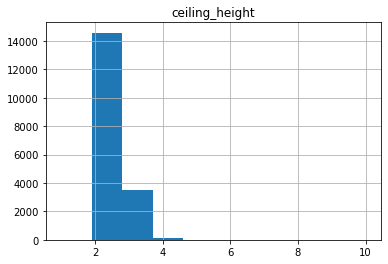

In [44]:
data.hist('ceiling_height', range=(1, 10));

Найдем долю значений больше 4, а также долю значений меньше 2.

In [45]:
print('Доля значений ceiling_height больше 4 метров -', 
      data[data['ceiling_height'] > 4]['ceiling_height'].count()/count_all)
print('Доля значений ceiling_height меньше 2 метров -', 
      data[data['ceiling_height'] < 2.5]['ceiling_height'].count()/count_all)

Доля значений ceiling_height больше 4 метров - 0.002463863337713535
Доля значений ceiling_height меньше 2 метров - 0.002463863337713535


Согласно гистограмме выше будем считать все значения больше 4 метров и меньше 2 случайными выбросами и удалим их.

In [46]:
data = data.drop(data[data['ceiling_height'] > 4].index)
data = data.drop(data[data['ceiling_height'] < 2].index)

#### kitchen_area

Выведем статистические сведения о столбце.

In [47]:
print(data['kitchen_area'].describe())

count   16,619.00
mean        10.90
std          6.16
min          1.30
25%          7.10
50%          9.70
75%         12.20
max        107.00
Name: kitchen_area, dtype: float64


Максимальное значение для него 112, а больше 75% квартир меньше 12.

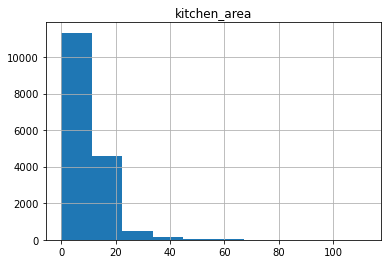

In [48]:
data.hist('kitchen_area', range=(0, 112));

Рассмотрим ближе диапазон от 20 до 60.

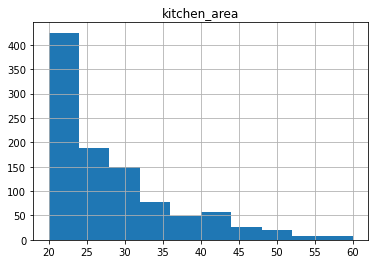

In [49]:
data.hist('kitchen_area', range=(20, 60));

Найдем долю квартир с площадью кухни больше 60 кв. метров.

In [50]:
print('Доля квартир с площадью кухни больше 60 кв. метров -', 
      data[data['kitchen_area'] > 60]['kitchen_area'].count()/count_all)

Доля квартир с площадью кухни больше 60 кв. метров - 0.0010950503723171265


Будем считать значения больше 60 случайными выбросами и удалим эти строки.

In [51]:
data = data.drop(data[data['kitchen_area'] > 60].index)

#### Выводы

Проанализировав сведения о каждом столбце, мы увидели, что в столбцах *last_price, total_area, rooms, ceiling_height, kitchen_area* возможно присутствуют выделяющиеся/ошибочные значения. Мы сделали этот вывод из-за очень большого различия между максимальным значением в столбце и границей третьего квартиля. Во всех столбцах мы отбросили выбивающиеся значения. В столбце *ceiling_height* предварительно исправили предположительно неверно записанные значения, исходя из стандартной высоты потолков в квартирах.

### Добавление в таблицу новых столбцов

#### Цена одного квадратного метра

In [52]:
# one_meter = last_price / total_area. Округлим полученное значение до сотых.

data['one_meter'] = round(data['last_price'] / data['total_area'], 2)
data['one_meter'].head() # Проверка

0   120,370.37
1    82,920.79
2    92,785.71
3   408,176.10
4   100,000.00
Name: one_meter, dtype: float64

#### День недели публикации объявления

In [53]:
# День недели публикации объявления (0 - пн, 1 - вт, 2- ср, 3 - чт, 4 - пт, 5 - сб, 6 - вс)
# publication_week_day - извлекаем день недели из даты публикации first_day_exposition (с помощью свойства dt.dayofweek)

print(data['first_day_exposition'].head())
data['publication_weekday'] = data['first_day_exposition'].dt.dayofweek
data['publication_weekday'].head() # Проверка

0   2019-03-07
1   2018-12-04
2   2015-08-20
3   2015-07-24
4   2018-06-19
Name: first_day_exposition, dtype: datetime64[ns]


0    3
1    1
2    3
3    4
4    1
Name: publication_weekday, dtype: int64

#### Месяц публикации объявления

In [54]:
# publication_month - извлекаем месяц из даты публикации first_day_exposition (.month)


print(data['first_day_exposition'].head())
data['publication_month'] = data['first_day_exposition'].dt.month
data['publication_month'].head() # Проверка

0   2019-03-07
1   2018-12-04
2   2015-08-20
3   2015-07-24
4   2018-06-19
Name: first_day_exposition, dtype: datetime64[ns]


0     3
1    12
2     8
3     7
4     6
Name: publication_month, dtype: int64

#### Год публикации объявления

In [55]:
# publication_year - извлекаем год из даты публикации first_day_exposition (.year)

print(data['first_day_exposition'].head())
data['publication_year'] = data['first_day_exposition'].dt.year
data['publication_year'].head() # Проверка

0   2019-03-07
1   2018-12-04
2   2015-08-20
3   2015-07-24
4   2018-06-19
Name: first_day_exposition, dtype: datetime64[ns]


0    2019
1    2018
2    2015
3    2015
4    2018
Name: publication_year, dtype: int64

#### Тип этажа квартиры

In [56]:
# Тип этажа квартиры (значения — «первый», «последний», «другой»)
# appartment_type
    
# Функция подстановки типа этажа квартиры - первый, последний, другой
def set_floor(row):
    if (row['floors_total'] != np.nan):
        floors_total = row['floors_total']
    else:
        return 'другой'
    floor = row['floor']    
    if floor == 1:
        return 'первый'
    elif floor == floors_total:
        return 'последний'
    return 'другой'

data['floor_type'] = data.apply(set_floor, axis=1)

In [57]:
print(data.groupby('floor_type')['floor_type'].count()) # проверка

floor_type
другой       13798
первый        1997
последний     2374
Name: floor_type, dtype: int64


#### Расстояние до центра города в километрах

In [58]:
# Переводим в километры (city_centers_nearest/1000) и округляем до целых значений (round(number))
# city_centers_km

display(data['city_centers_nearest'].head())
data['city_centers_km'] = round(data['city_centers_nearest'] / 1000)#.convert_dtypes()
display(data['city_centers_km'].head())

0   16,028.00
1   18,603.00
2   13,933.00
3    6,800.00
4    8,098.00
Name: city_centers_nearest, dtype: float64

0   16.00
1   19.00
2   14.00
3    7.00
4    8.00
Name: city_centers_km, dtype: float64

In [59]:
data['city_centers_nearest'].isna().sum()

0

## Исследовательский анализ данных

### Исследование параметров объекта

**Исследуем параметры объектов:**
- 1. общая площадь;
- 2. жилая площадь;
- 3. площадь кухни;
- 4. цена объекта;
- 5. количество комнат;
- 6. высота потолков;
- 7. этаж квартиры;
- 8. тип этажа квартиры («первый», «последний», «другой»);
- 9. общее количество этажей в доме;
- 10.расстояние до центра города в метрах;
- 11.расстояние до ближайшего аэропорта;
- 12.расстояние до ближайшего парка;
- 13.день и месяц публикации объявления.

Для каждого выведем общие сведения и построим гистограмму

#### Общая площадь (total_area)

count   18,169.00
mean        62.44
std         34.42
min         12.00
25%         41.00
50%         54.00
75%         72.60
max        400.00
Name: total_area, dtype: float64

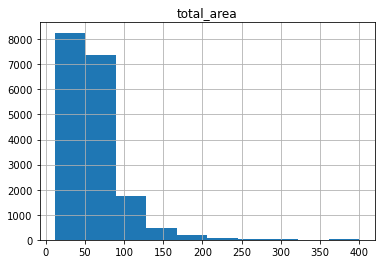

In [60]:
display(data['total_area'].describe())
data.hist('total_area');

#### Жилая площадь (living_area)

count   18,169.00
mean        35.50
std         21.68
min          2.00
25%         19.00
50%         30.50
75%         43.70
max        260.00
Name: living_area, dtype: float64

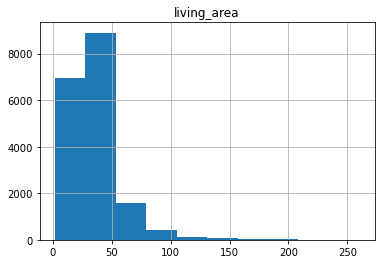

In [61]:
display(data['living_area'].describe())
data.hist('living_area');

#### Площадь кухни (kitchen_area)

count   16,599.00
mean        10.82
std          5.73
min          1.30
25%          7.10
50%          9.62
75%         12.10
max         60.00
Name: kitchen_area, dtype: float64

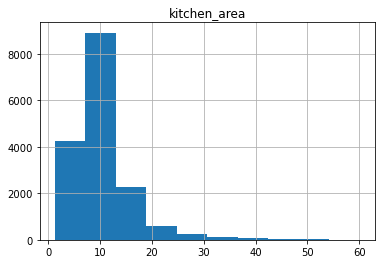

In [62]:
# Выведем общие сведения и построим гистограмму
display(data['kitchen_area'].describe())
data.hist('kitchen_area');

#### Цена объекта

count        18,169.00
mean      7,282,384.65
std       8,627,994.36
min          12,190.00
25%       4,000,000.00
50%       5,250,000.00
75%       7,600,000.00
max     330,000,000.00
Name: last_price, dtype: float64

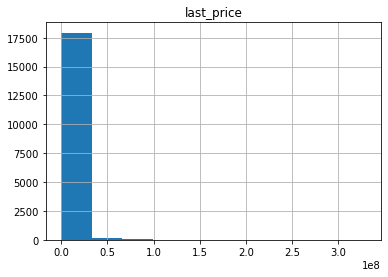

In [63]:
display(data['last_price'].describe())
data.hist('last_price');

Из-за наличия больших значений в четвертом квартиле гистограмма на всем диапазоне значений неинформативна.

Рассмотрим подробнее данные, которые меньше границы 4 квартиля.

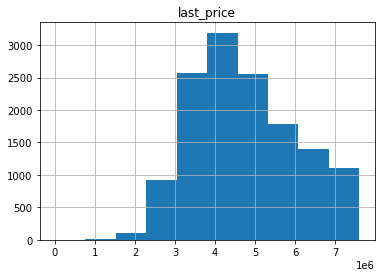

In [64]:
data.hist('last_price', range=(0, data.last_price.quantile(0.75)));

#### Количество комнат

count   18,169.00
mean         2.13
std          1.09
min          0.00
25%          1.00
50%          2.00
75%          3.00
max         11.00
Name: rooms, dtype: float64

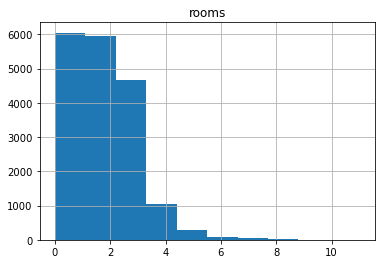

In [65]:
display(data['rooms'].describe())
data.hist('rooms');

#### Высота потолков

count   18,169.00
mean         2.71
std          0.22
min          2.00
25%          2.60
50%          2.65
75%          2.70
max          4.00
Name: ceiling_height, dtype: float64

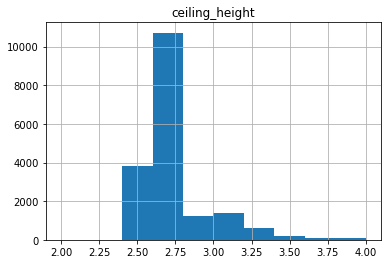

In [66]:
display(data['ceiling_height'].describe())
data.hist('ceiling_height');

#### Этаж квартиры

count   18,169.00
mean         6.15
std          4.96
min          1.00
25%          3.00
50%          5.00
75%          8.00
max         33.00
Name: floor, dtype: float64

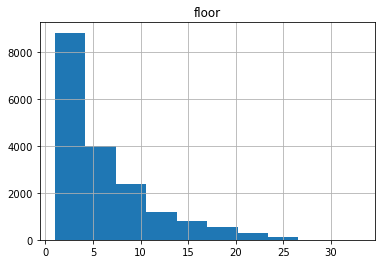

In [67]:
display(data['floor'].describe())
data.hist('floor');

Узнаем процент квартир в домах выше 25 этажей.

In [68]:
print('Квартир в домах выше 25 этажей -', round(data[data['floor'] > 25]['floor'].count() / data['floor'].count(), 3))

Квартир в домах выше 25 этажей - 0.002


#### Тип этажа квартиры («первый», «последний», «другой»)

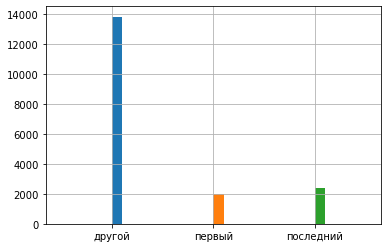

In [69]:
data.groupby('floor_type')['floor_type'].count()
data.groupby('floor_type')['floor_type'].hist();

Посчитаем процент квартир на первом и последнем этажах.

In [70]:
print('Процент квартир на первом этаже -', round(data[data['floor_type'] == 'первый']['floor_type'].count()/data['floor_type'].count(), 2))
print('Процент квартир на последнем этаже -', round(data[data['floor_type'] == 'последний']['floor_type'].count()/data['floor_type'].count(), 2))

Процент квартир на первом этаже - 0.11
Процент квартир на последнем этаже - 0.13


#### Общее количество этажей в доме

count   18,169.00
mean        11.20
std          6.54
min          1.00
25%          5.00
50%          9.00
75%         16.00
max         60.00
Name: floors_total, dtype: float64

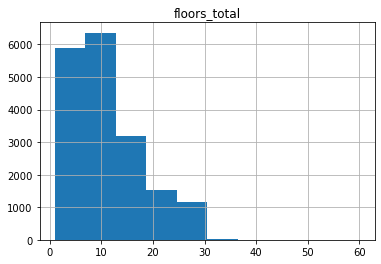

In [71]:
display(data['floors_total'].describe())
data.hist('floors_total');

#### Расстояние до центра города в метрах

count   18,169.00
mean    14,271.33
std      8,619.88
min        181.00
25%      9,380.00
50%     13,138.00
75%     16,350.00
max     65,968.00
Name: city_centers_nearest, dtype: float64

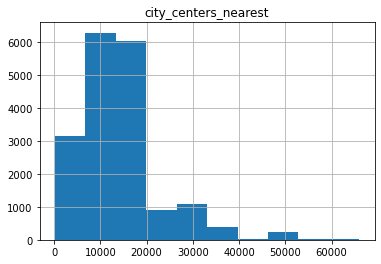

In [72]:
display(data['city_centers_nearest'].describe())
data.hist('city_centers_nearest');

Расстояние до ближайшего аэропорта

count   18,169.00
mean    28,888.48
std     12,700.51
min          0.00
25%     18,590.00
50%     26,902.00
75%     37,393.00
max     84,869.00
Name: airports_nearest, dtype: float64

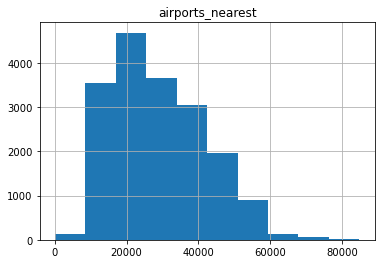

In [73]:
display(data['airports_nearest'].describe())
data.hist('airports_nearest');

Посчитаем процент квартир с  расстоянием до аэропорта больше 60 км.

In [74]:
print('Процент квартир с расстоянием до аэропорта больше 60 км -', 
      round(data[data['airports_nearest'] > 60000]['airports_nearest'].count() / data['airports_nearest'].count(), 2))

Процент квартир с расстоянием до аэропорта больше 60 км - 0.01


#### Расстояние до ближайшего парка

count   8,005.00
mean      490.89
std       342.61
min         1.00
25%       288.00
50%       454.00
75%       612.00
max     3,190.00
Name: parks_nearest, dtype: float64

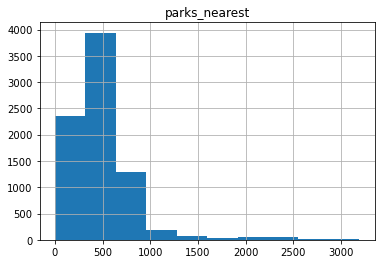

In [75]:
display(data['parks_nearest'].describe())
data.hist('parks_nearest');

#### День публикации объявления

count   18,169.00
mean         2.56
std          1.78
min          0.00
25%          1.00
50%          3.00
75%          4.00
max          6.00
Name: publication_weekday, dtype: float64

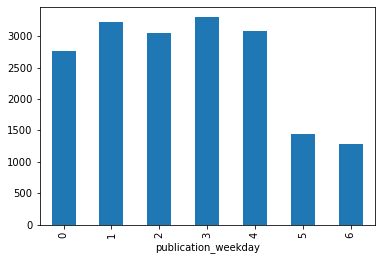

In [76]:
display(data['publication_weekday'].describe())
data.groupby('publication_weekday')['publication_weekday'].count().plot(kind='bar');

#### Месяц публикации объявления

count   18,169.00
mean         6.40
std          3.47
min          1.00
25%          3.00
50%          6.00
75%         10.00
max         12.00
Name: publication_month, dtype: float64

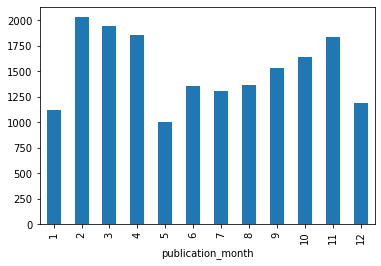

In [77]:
display(data['publication_month'].describe())
data.groupby('publication_month')['publication_month'].count().plot(kind='bar');

#### Выводы

Большинство квартир меньше 70 кв. метров, с жилой площадью меньше 42 кв. метров и кухней меньше 12 кв. метров.
В среднем это квартиры площадью 60 кв. метров, с жилой площадью 34 кв. м и кухней 10 кв. метров.
Немного квартир имеют площади, значительно превосходящие средние значения.  
В среднем стоимость квартиры составляет около 6 млн. Но как и с площадью, стоимость многих квартир в десятки раз превосходит среднюю.  
Среднестатистическая квартира - 2-3хкомнатная, со стандартной высотой потолков 2.7 метров.  
Больше всего квартир в 5-9этажках. Всего 0,002 квартир продается в домах выше 25 этажей.  
По 0,1 квартир продается на первом и последнем этажах.  
Большинство квартир находится в пределах 16 километров от центра города и 60 км от аэропорта.  
В пределах не более 3 км от всех квартир есть парки.  
Реже всего объявления публикуются на выходных. В конце рабочей недели публикуется больше объявлений, чем в начале.  
Самые неактивные месяцы - январь и май. Скорее всего это связано с большим количеством выходных дней в этих месяцах. Также выделяется меньшими значениями "предпраздничный" декабрь. Больше всего объявлений публикуется с февраля по апрель. В летние месяцы количество объявлений стабильно. И осенью число растет.

### Анализ скорости продажи квартиры

Выведем на экран статистические характеристики.

In [78]:
data['days_exposition'].describe()

count   18,169.00
mean       170.57
std        209.62
min          1.00
25%         46.00
50%         96.00
75%        200.00
max      1,572.00
Name: days_exposition, dtype: float64

Возьмем столбец days_exposition, который содержит число дней, в течение которых было размещено каждое объявление.

Построим для него гистограмму.

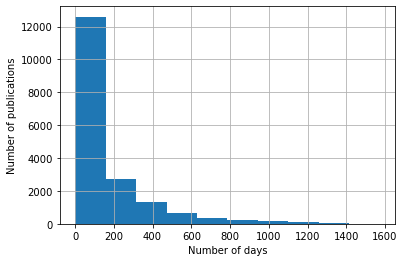

In [79]:
ax = data['days_exposition'].hist()
ax.set_xlabel('Number of days')
ax.set_ylabel('Number of publications')
ax.plot();

Рассмотрим подробнее график в пределах верхнего квартиля.

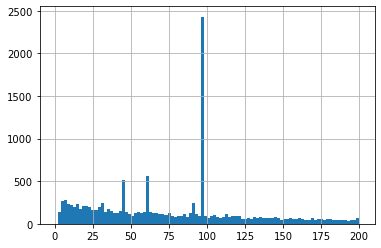

In [80]:
data['days_exposition'].hist(bins=100, range=(0, data.days_exposition.quantile(0.75)));

На диаграмме мы видим несколько пиковых значений: 45, 60, 95. Такое количество "круглых" значений срока размещения объявления говорит о том, что это могут быть стандартные сроки размещения объявлений, после которых объявления снимаются с публикации автоматически.

Исключим из анализа эти три значения, чтобы получить более точную картину распределения значений для столбца *days_exposition*.

Удалим квартиры со сроком размещения объявлений 45, 60 и 95 дней. Возможно, что среди них есть квартиры, которые продались именно за этот срок, а не были сняты с публикации автоматически.  
Чтобы не искажать исходные данные, создадим новую таблицу new_df, в которую запишем объявления, срок размещения которых не 45, 60 или 95 дней. И проведем анализ сроков размещения.

In [81]:
new_df = data.query('days_exposition not in [45, 60, 95]')

Выведем на экран статистические данные.

In [82]:
display(new_df['days_exposition'].describe())

count   17,218.00
mean       176.95
std        213.50
min          1.00
25%         49.00
50%         96.00
75%        212.00
max      1,572.00
Name: days_exposition, dtype: float64

Построим гистограмму.

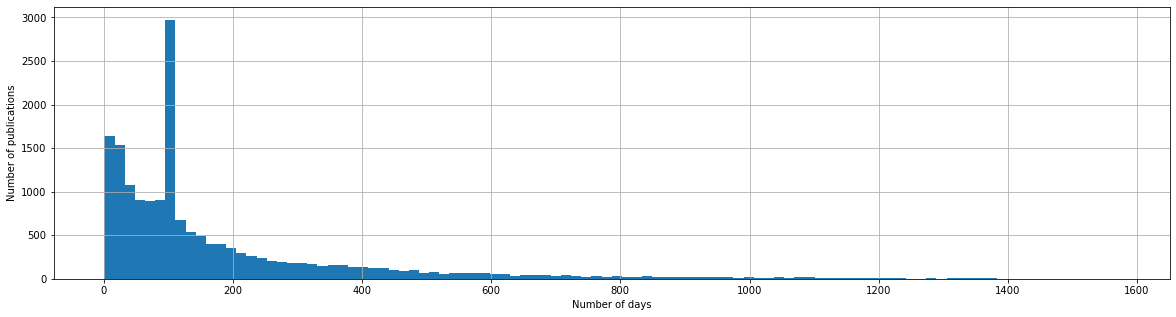

In [83]:
ax = new_df['days_exposition'].hist(bins=100, figsize=(20, 5))
ax.set_xlabel('Number of days')
ax.set_ylabel('Number of publications')
ax.plot();

#### Вывод

Избавившись от выбивающихся по частотности значений (40, 60 и 95 дней), мы получили более точную картину распределения сроков публикации объявлений.

Обычно продажа занимает около 108 дней - это медианное значение. Поскольку максимальная длительность значительно больше, средняя длительность продаж выше - 190 дней.

Продажи, расположенные в четвертом квартиле, то есть длительностью более 249 дней, можно считать необычно долгими.
Продажи, расположенные в первом квартиле, то есть длительностью менее 42 дней, можно считать быстрыми.

### Определение факторов, влияющих на полную стоимость объекта

Изучим, зависит ли цена от таких факторов, как:
- общей площади;
- жилой площади;
- площади кухни;
- количества комнат;
- этажа, на котором расположена квартира (первый, последний, другой);
- даты размещения (день недели, месяц, год).

Для построения графика будем использовать столбец price_in_million (стоимость в млн). Для построения гистограммы будем формировать сводную таблицу, в которой индексом будет исследуемая величина, а значением - цена. В качестве функции агрегации возьмем медиану, чтобы избежать влияния выбросов.

#### Общая площадь

Посчитаем коэффициент корреляции Пирсона, а также оценим зависимость цены от общей площади по графику.

In [84]:
print('Корреляция: ', round(data['total_area'].corr(data['price_in_mill']), 2))

Корреляция:  0.69


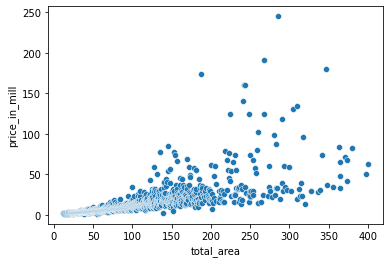

In [85]:
# Строим диаграмму рассеяния

sns.scatterplot(data=data.pivot_table(index='total_area', values='price_in_mill', aggfunc='median'),
                x='total_area', y='price_in_mill');

**Вывод**  
Между общей площадью и ценой наблюдается умеренная положительная корреляция: с увеличением площади цена растет, а также уведичивается разброс цен.

#### Жилая площадь

Посчитаем коэффициент корреляции Пирсона, а также оценим зависимость цены от жидлй площади по графику.

Корреляция:  0.6


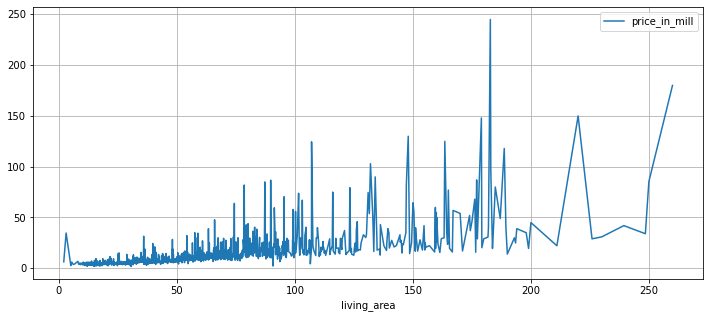

In [86]:
print('Корреляция: ', round(data['living_area'].corr(data['price_in_mill']), 2))
(
data.pivot_table(index='living_area', values='price_in_mill', aggfunc='median')
    .plot(grid=True, figsize=(12, 5))
);

**Вывод**  
Между жилой площадью и ценой наблюдается умеренная положительная корреляция: с увеличением жилой площади стоимость квартиры растет. Чем больше площадь, тем больше скачки в цене.

#### Площадь кухни

Посчитаем коэффициент корреляции Пирсона, а также оценим зависимость цены от площади кухни по графику.

Корреляция:  0.5


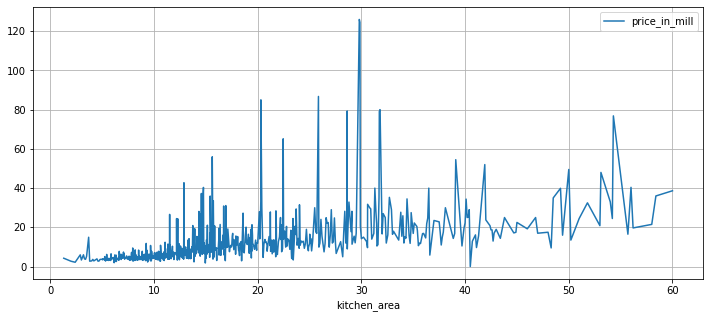

In [87]:
print('Корреляция: ', round(data['kitchen_area'].corr(data['price_in_mill']), 2))
(
data.pivot_table(index='kitchen_area', values='price_in_mill', aggfunc='median')
    .plot(grid=True, figsize=(12, 5))
);

**Вывод**  
Между площадью кухни и ценой наблюдается умеренная положительная корреляция: с увеличением площади кухни стоимость квартиры растет. Чем больше площадь, тем больше скачки в цене.

#### Количество комнат

Посчитаем коэффициент корреляции Пирсона, а также оценим зависимость цены от количества комнат по графику.

Корреляция:  0.42


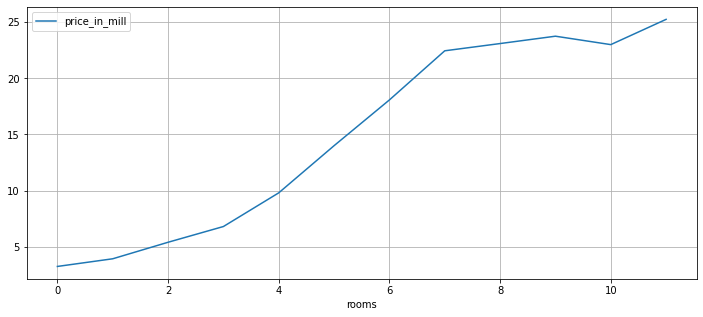

In [88]:
print('Корреляция: ', round(data['rooms'].corr(data['price_in_mill']), 2))
(
data.pivot_table(index='rooms', values='price_in_mill', aggfunc='median')
    .plot(grid=True, figsize=(12, 5))
);

**Вывод**  
Между числом комнат и ценой наблюдается слабая положительная корреляция. После 7 комнат цена растет незначительно. Для 10 комнат наблюдается уменьшение стоимости. Это может быть вызвано небольшим спросом на подобные квартиры.

#### Этаж

Посчитаем коэффициент корреляции Пирсона, а также оценим зависимость цены от этажа по графику.

Корреляция:  0.04


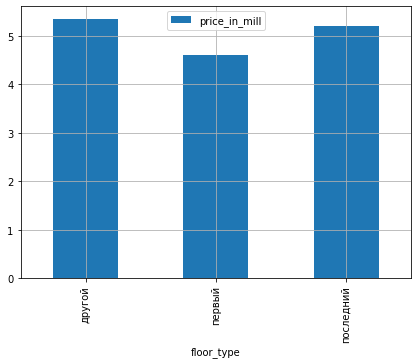

In [89]:
# Чтобы рассчитать коэффициент корреляции добавим в таблицу столбец floor_type_num,
# в который запишем тип этажа в числовом виде согласно словарю type_dict.

type_dict = {'первый': 0, 'последний': 1, 'другой': 2}
data['floor_type_num'] = data['floor_type'].replace(type_dict)
print('Корреляция: ', round(data['floor_type_num'].corr(data['price_in_mill']), 2))

(
data.pivot_table(index='floor_type', values='price_in_mill', aggfunc='median')
    .plot(grid=True, figsize=(7, 5), kind='bar')
);

**Вывод**  
Между этажом и ценой корреляция практически отсутствует.  Квартиры на первом и послежнем этажах стоят немного дешевле других.

#### День недели публикации объявления

Посчитаем коэффициент корреляции Пирсона, а также оценим зависимость цены от дня размещения по графику.

Корреляция:  -0.0038


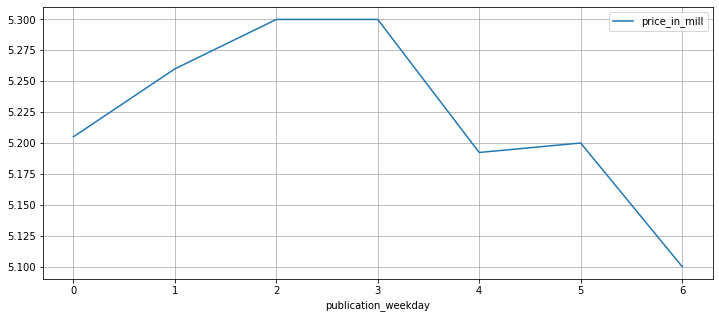

In [90]:
print('Корреляция: ', round(data['publication_weekday'].corr(data['price_in_mill']), 4))
(
data.pivot_table(index='publication_weekday', values='price_in_mill', aggfunc='median')
    .plot(grid=True, figsize=(12, 5))
);

**Вывод**  
Между днем размещения и ценой корреляция практически отсутствует. В выходные размещают объявления с более дешевыми квартирами. Объявления о самых дорогих квартирах размещаются во вторник и среду.

#### Месяц публикации объявления

Посчитаем коэффициент корреляции Пирсона, а также оценим зависимость цены от месяца размещения по графику.

Корреляция:  0.0006


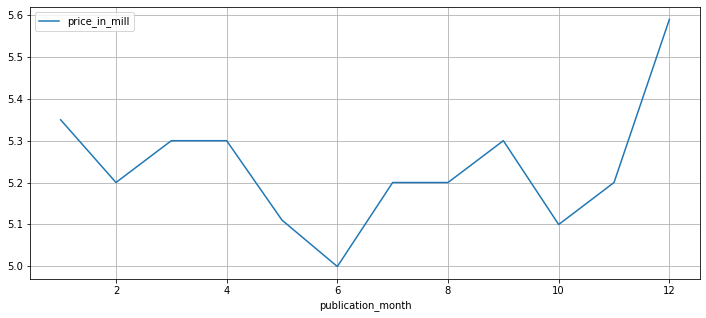

In [91]:
print('Корреляция: ', round(data['publication_month'].corr(data['price_in_mill']), 4))
(
data.pivot_table(index='publication_month', values='price_in_mill', aggfunc='median')
    .plot(grid=True, figsize=(12, 5))
);

**Вывод**  
Между месяцем размещения и ценой корреляция практически отсутствует. Пик цен приходится на апрель, после которого наблюдается стремительное падение цен. В апреле цены самые низкие.

#### Год публикации объявления

Посчитаем коэффициент корреляции Пирсона, а также оценим зависимость цены от года размещения по графику.

Корреляция:  -0.0461


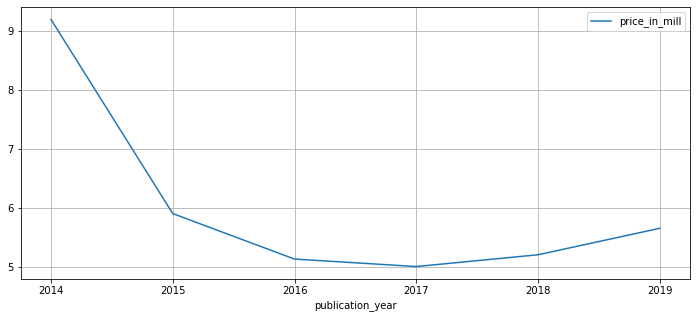

In [92]:
print('Корреляция: ', round(data['publication_year'].corr(data['price_in_mill']), 4))
(
data.pivot_table(index='publication_year', values='price_in_mill', aggfunc='median')
    .plot(grid=True, figsize=(12, 5))
);

**Вывод**

Между годом размещения и ценой корреляция практически отсутствует. Диапазон наблюдения можно разделить на 3 части:
- 2014-2016 - падение цен
- 2016-2018 - стабильность цен
- 2018-2019 - рост цен

### Анализ стоимости одного квадратного метра

Рассчитаем среднюю стоимость одного квадратного метра в 10 населенных пунктах с наибольшим числом объявлений.

Выделим населенные пункты с самой высокой и самой низкой стоимостью квадратного метра.

In [93]:
# В таблицу добавим новый столбец one_meter_price, в который запишем стоимость 
# одного квадратного метра (last_price/total_area)

data['one_meter_price'] = data['last_price'] / data['total_area']

# Составляем список из 10 населенных пунктов с наибольшим числом объявлений

locality_list = data.groupby('locality_name')['last_price'].count().sort_values(ascending=False).head(10)

# Фильтруем исходную таблицу, оставляя только населенные пункты из топ-10

top_ten_data = data[data['locality_name'].isin(locality_list.index)]

# Считаем среднюю стоимость кв. метра по населенным пунктам

(
    top_ten_data.pivot_table(index='locality_name', values='one_meter_price', aggfunc='mean')
                .sort_values(by='one_meter_price', ascending=False)
)

,one_meter_price
locality_name,
Санкт-Петербург,"114,074.17"
Пушкин,"102,857.15"
Сестрорецк,"101,757.62"
Парголово,"90,175.91"
Петергоф,"84,757.56"
Кронштадт,"79,714.44"
Шушары,"78,677.36"
Колпино,"75,424.58"
Ломоносов,"72,724.05"


Определим населенные пункты с самой высокой и самой низкой стоимостью кв. метра.

In [94]:
min_price = top_ten_data['one_meter_price'].min()
display(top_ten_data.query('one_meter_price == @min_price'));
print('Населенный пункт с самой низкой стоимостью кв. метра')

max_price = top_ten_data['one_meter_price'].max()
display(top_ten_data.query('one_meter_price == @max_price'));
print('Населенный пункт с самой высокой стоимостью кв. метра')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,days_exposition,price_in_mill,one_meter,publication_weekday,publication_month,publication_year,floor_type,city_centers_km,floor_type_num,one_meter_price
8793,7,"12,190.00",109.00,2019-03-20,2,2.75,25,32.00,25,False,...,8,0.01,111.83,2,3,2019,последний,9.00,1,111.83


Населенный пункт с самой низкой стоимостью кв. метра


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,days_exposition,price_in_mill,one_meter,publication_weekday,publication_month,publication_year,floor_type,city_centers_km,floor_type_num,one_meter_price
1436,19,"330,000,000.00",190.00,2018-04-04,3,3.50,7,95.00,5,False,...,233,330.00,"1,736,842.11",2,4,2018,другой,1.00,2,"1,736,842.11"


Населенный пункт с самой высокой стоимостью кв. метра


Самая дешевая и самая дорогая квартиры расположены в Санкт-Петербурге. Самая дорогая квартира - 3-комнатная, расположена на 5 этаже 7-этажного дома с пололками 3.5 м в самом центре города. Самая дешевая квартира расположена на последнем этаже 25-этажного дома, 2 комнаты, жилая площадь 32 метра. Для стандартной квартиры стоимость подозрительно низкая.

### Оценка зависимости цены от расстояния до центра

Для квартир в Санкт-Петербурге вычислим среднюю цену каждого километра. При расчете будем использовать медианное значение, чтобы аномально высокие значения цены не влияли на анализ.

Построим диаграмму рассеяния, чтобы оценить зависимость цены от расстояния до центра Санкт-Петербурга.

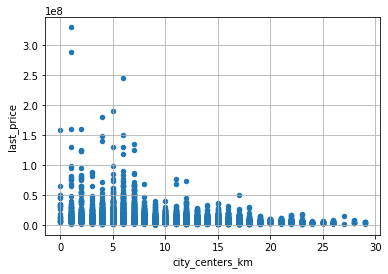

In [95]:
(
    data.query('locality_name == "Санкт-Петербург"')
        .sort_values(by='city_centers_km')
        .plot(x='city_centers_km', y='last_price', kind='scatter', grid=True)
);

По диаграмме мы видим, что чем дальше квартира расположена от центра, тем она дешевле. Чем ближе квартира расположена к центру, тем больше разброс цен. Найдем среднюю стоимость километра.

Определим число квартир, которые находятся "в центре" города.

In [96]:
data[data.city_centers_km == 0]['city_centers_km'].count()

23

In [97]:
data.city_centers_km.isna().sum()

0

Сгруппируем в отдельную таблицу spb_data квартиры в Санкт-Петербурге и найдем медианное значение цены и расстояния от центра.

In [98]:
spb_data = (
            data.query('locality_name == "Санкт-Петербург"')
                .pivot_table(index='locality_name', values=['last_price', 'city_centers_km'], aggfunc='median')
)
# Выведем результат на экран
display(spb_data)

# Найдем медианное значение стоимости 1 километра
one_meter = (spb_data['last_price']/spb_data['city_centers_km'])[0]
print('Средняя цена километра -', round(one_meter, 2))

,city_centers_km,last_price
locality_name,,
Санкт-Петербург,12.00,"5,500,000.00"


Средняя цена километра - 458333.33


## Общий вывод

Мы проанализировали данные о продаже квартир в Санкт-Петербурге и окрестностях.
    
В рамках предобработки данных мы выполнили следующие действия:
- Переименовали столбец cityCenters_nearest в city_centers_nearest для согласованности имен столбцов.
- В исходных данных в 14 столбцах имеются пропуски. Мы удалили пропуски для следующих столбцов:
	- 'ceiling_height' заполнили медианным значением,
	- 'living_area' заполнили медианным значением для соответсвующего числа комнат,
	- 'is_apartment' заполнили значением False,
	- 'balcony' заполнили значением False,
	- 'parks_around3000' и 'ponds_around3000' заполили 1, если в столбце *_nearest значение меньше 3000, в противном случае 0,
	- 'airports_nearest' и 'city_centers_nearest' заполнили средним значением для этой местности (не для всех значений удалось найти среднее),
	- 'floors_total' заполнили медианным значением или числом комнат, если медианное значение больше числа комнат,
	- 'days_exposition' заполнили медианным значением.
- Мы удалили строки с пропусками в следующих столбцах:
	- 'locality_name' - поскольку местоположение квартиры имеет первостепенное значение, строки без этого значения не будут показательны для анализа.
- Для 4 столбцов мы изменили тип данных:
	- 'first_day_exposition': object -> datetime (т. к. это дата),
	- 'floors_total': object -> int (т. к. количество этажей - целое число),
	- 'balcony': float64 -> int (т. к. количество балконов - целое число),
	- 'days_exposition': float64 -> int (т. к. количество дней - целое число).
- Для столбца 'locality_name' мы удалили дубликаты, заменив букву ё на е и отбросив описательные слова, такие как городской поселок, коттеджный поселок, поселок и т. д.
- С помощью анализа диаграмм мы отбросили редкие и выбивающиеся значения для следующих столбцов:
	- 'last_price'
	- 'total_area'
	- 'rooms'
	- 'ceiling_height'
	- 'kitchen_area'
- Мы добавили новые столбцы в таблицу:
	- 'one_meter' - цена одного кв. метра
	- 'publication_weekday' - день недели публикации объявления
	- 'publication_month' - месяц публикации объявления
	- 'publication_year' - год публикации объявления
	- 'floor_type' - тип этажа квартиры (значения — «первый», «последний», «другой»)

После предобработки данных мы перешли к анализу данных, в результате которого установили следующее:
- Больше всего стоимость квартиры зависит от общей и жилой площади, а также числа комнат.
- Цены на квартиры выше в перириод с февраля по апрель. В мае и июне стоимость квартир самая низкая.
- В среднем на продажу квартиры уходит 3 месяца.
- За период наблюдения с 2014 по 2019 год до 2016 года наблюдалось падение цен, затем постепенный рост.
- Стоимость квартир тем выше, чем ближе квартира расположена к центру города.

С ходе анализа *скорости продажи квартир* мы выяснили, что на диаграмме распределения присутствуют несколько пиковых значений: 45, 60, 95. 
Такое количество "круглых" значений срока размещения объявления говорит о том, что это могут быть стандартные сроки размещения объявлений, после которых объявления снимаются с публикации автоматически.
Это предположение необходимо проверить. В ходе анализа мы исключили из рассмотрения эти значения, чтобы получить более показательные результаты. Если объявления действительно снимаются с публикации автоматически, можно добавить специальную метку-столбец, чтобы не исключать из анализа квартиры, действительно проданные за 45, 60 и 95 дней.

Кроме того, необходимо выяснить причину пропусков в столбце locality_name, поскольку это важный параметр и без него не имеет смысла учитывать квартиру в анализе.
Поскольку в картографических данных (столбцах  parks_nearest, ponds_nearest, airports_nearest и city_centers_nearest) содержится много пропусков, необходимо проверить источник получения этих данных.